<center><h1>Amazon Reviews Sentiment Analysis </h1></center>

The dataset used in this analysis can be found at- https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [1]:
import numpy as np
import pandas as pd
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('words')
#nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Reviews.csv')

In [3]:
df.shape

(568454, 10)

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

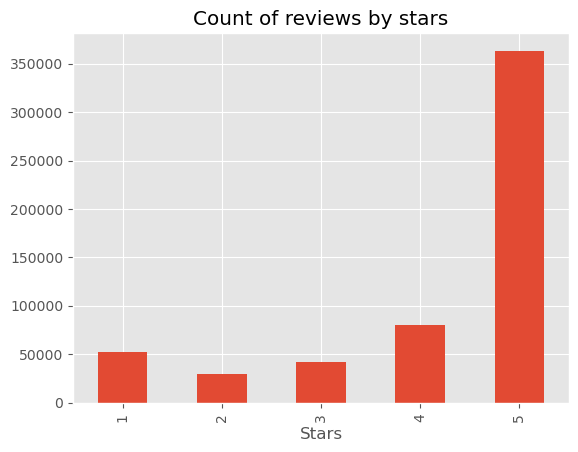

In [6]:
axis=df['Score'].value_counts() \
                .sort_index() \
                .plot(kind="bar", 
                      title="Count of reviews by stars")

axis.set_xlabel("Stars")
plt.show()

### Tokenization

In [7]:
sample_text = df['Text'][0]
sample_text

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [8]:
tokens = nltk.word_tokenize(sample_text)
tokens

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality',
 '.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better',
 '.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 'most',
 '.']

### Part-of-speech tagging

In [9]:
tagged = nltk.pos_tag(tokens)
tagged 

[('I', 'PRP'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('several', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Vitality', 'NNP'),
 ('canned', 'VBD'),
 ('dog', 'RP'),
 ('food', 'NN'),
 ('products', 'NNS'),
 ('and', 'CC'),
 ('have', 'VBP'),
 ('found', 'VBN'),
 ('them', 'PRP'),
 ('all', 'DT'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('of', 'IN'),
 ('good', 'JJ'),
 ('quality', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('product', 'NN'),
 ('looks', 'VBZ'),
 ('more', 'RBR'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('stew', 'NN'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('processed', 'JJ'),
 ('meat', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('smells', 'VBZ'),
 ('better', 'RBR'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('Labrador', 'NNP'),
 ('is', 'VBZ'),
 ('finicky', 'JJ'),
 ('and', 'CC'),
 ('she', 'PRP'),
 ('appreciates', 'VBZ'),
 ('this', 'DT'),
 ('product', 'NN'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('most', 'JJS'),
 ('.', '.')]

### Chunking

In [10]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  have/VBP
  bought/VBN
  several/JJ
  of/IN
  the/DT
  (ORGANIZATION Vitality/NNP)
  canned/VBD
  dog/RP
  food/NN
  products/NNS
  and/CC
  have/VBP
  found/VBN
  them/PRP
  all/DT
  to/TO
  be/VB
  of/IN
  good/JJ
  quality/NN
  ./.
  The/DT
  product/NN
  looks/VBZ
  more/RBR
  like/IN
  a/DT
  stew/NN
  than/IN
  a/DT
  processed/JJ
  meat/NN
  and/CC
  it/PRP
  smells/VBZ
  better/RBR
  ./.
  My/PRP$
  (ORGANIZATION Labrador/NNP)
  is/VBZ
  finicky/JJ
  and/CC
  she/PRP
  appreciates/VBZ
  this/DT
  product/NN
  better/JJR
  than/IN
  most/JJS
  ./.)


# Valence Aware Dictionary and sEntiment Reasoner (VADER)

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 

In [12]:
sia = SentimentIntensityAnalyzer()

In [13]:
sia.polarity_scores("The Office was a great show")

{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}

In [14]:
sia.polarity_scores("Season 8 of Game of Thrones was terrible")

{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.4767}

In [15]:
#Running the polarity scores on the entire dataset
res={}

for i, row in tqdm(df.iterrows(), total=len(df)):
    row_id = row['Id']
    text = row['Text']
    res[row_id]=sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [16]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [17]:
#Convert the dictionary into a dataframe
vaders = pd.DataFrame(res).T

In [18]:
vaders = vaders.reset_index().rename(columns={"index":"Id"})
vaders = vaders.merge(df, how='left')

In [19]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


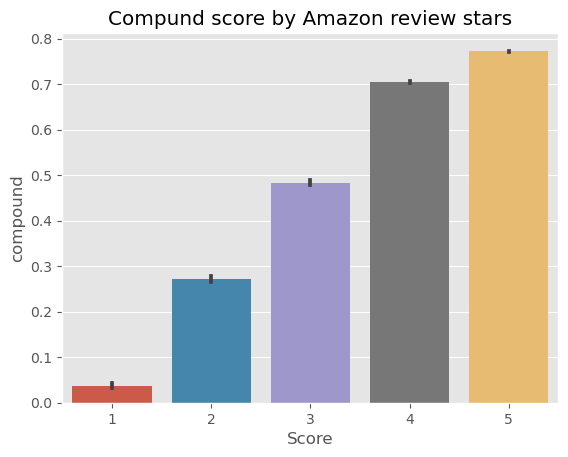

In [20]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund score by Amazon review stars')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.tight_layout()
plt.show()

# Robustly optimized Biderectional Encoder Representation for Transformers approach (RoBERTa)

In [ ]:
#pip install transformers

In [23]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [24]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [25]:
#Run on the RoBERTa model
encoded_text = tokenizer(sample_text, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}
print(scores_dict)

{'roberta_neg': 0.009624249, 'roberta_neu': 0.049980428, 'roberta_pos': 0.94039524}


In [26]:
def roberta_scores(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]
    }
    return scores_dict

In [43]:
res={}

df2=df.head(1000)

for i, row in tqdm(df2.iterrows(), total=1000):
    try:
        row_id = row['Id']
        text = row['Text']

        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = roberta_scores(text)
        both = {**vader_result_rename, **roberta_result}
        res[row_id] = both
    
    except RuntimeError:
        print(f"Broke for id: {row_id}")

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id: 83
Broke for id: 187
Broke for id: 529
Broke for id: 540
Broke for id: 746
Broke for id: 863


In [44]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [45]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

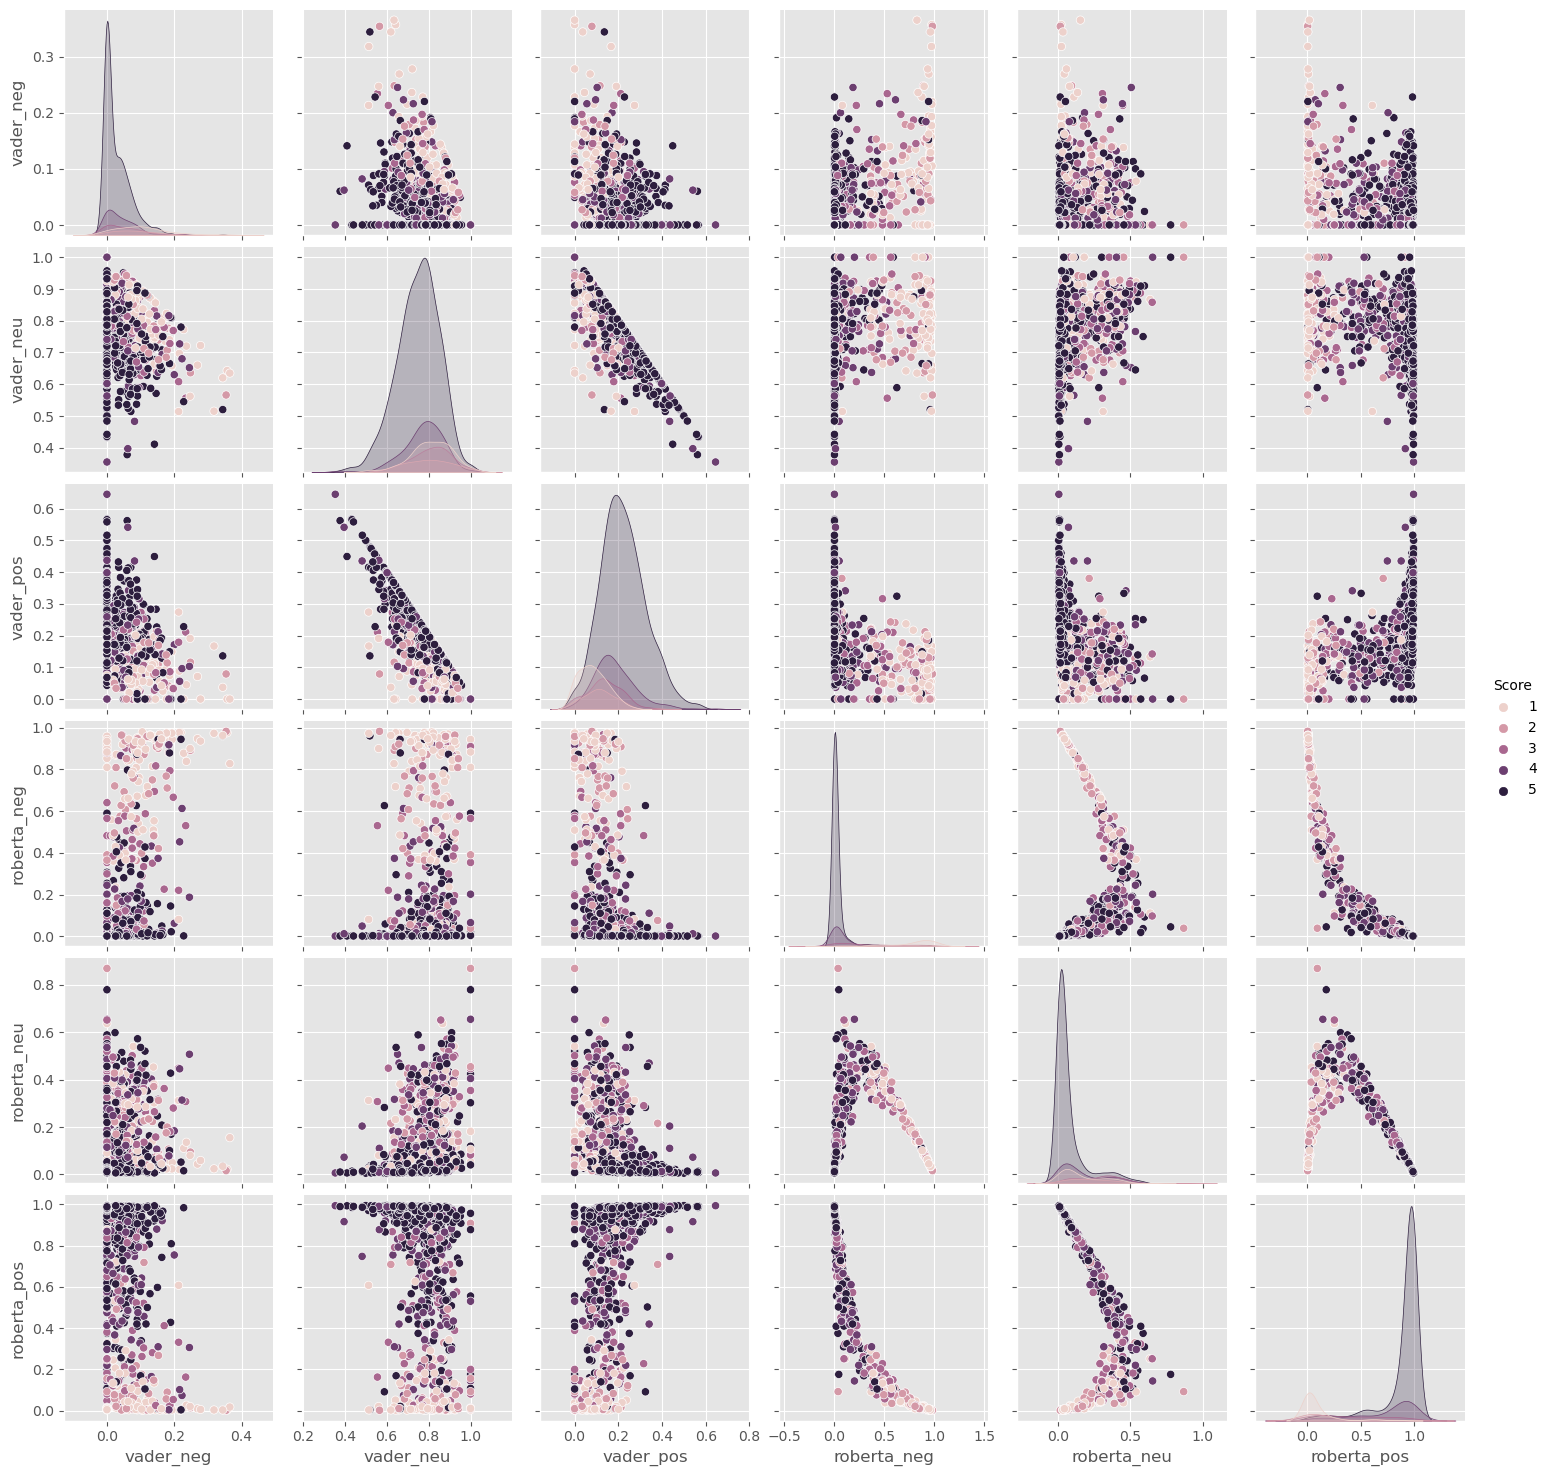

In [49]:
sns.pairplot(results_df, vars=['vader_neg', 'vader_neu', 'vader_pos',
                               'roberta_neg', 'roberta_neu', 'roberta_pos'],
                        hue='Score')
plt.show()

### Most positive 1 star review

In [50]:
results_df.query('Score==1')\
          .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

### Most negative 5 star review

In [53]:
results_df.query('Score==5')\
          .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'